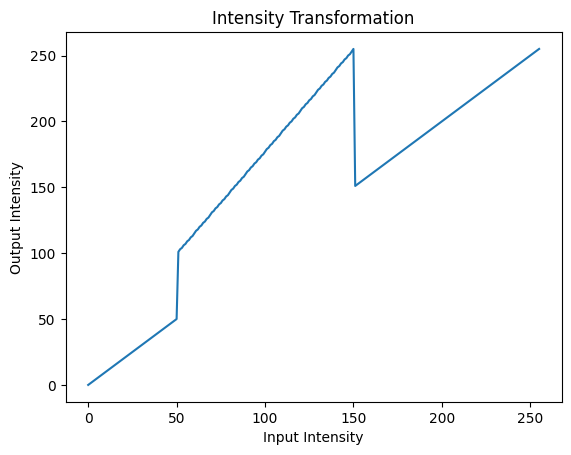

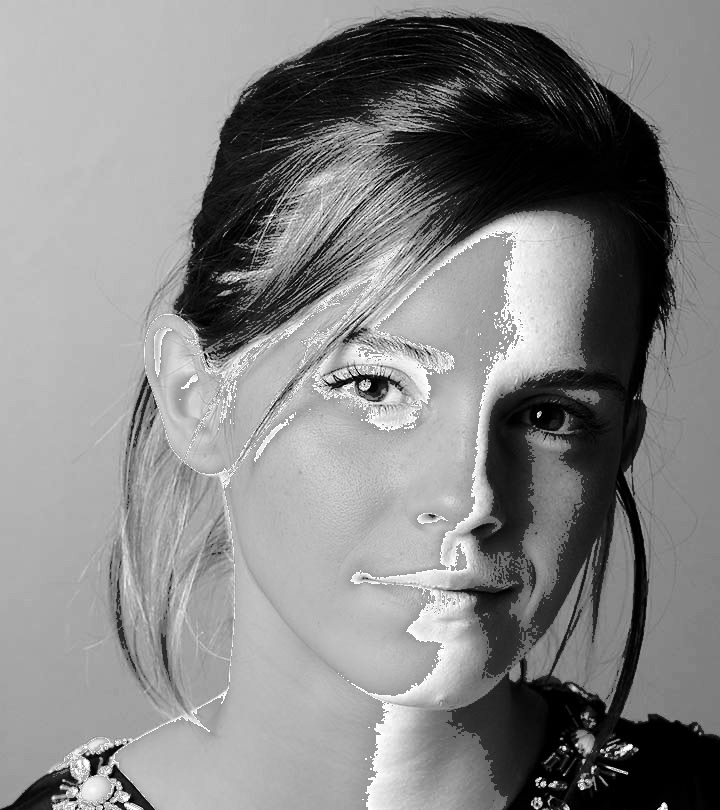

In [61]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

x1 = np.arange(51)
x2 = np.arange(51,151)
x3 = np.arange(151,256)

# defining the intensity transformations as piece wise functions
y1 = x1
y2 = 1.55 * x2 + 22.5
y3 = x3

transform = np.hstack((y1,y2,y3)).astype('uint8')

img = cv.imread('emma.jpg',0)
img_transformed = cv.LUT(img,transform)

plt.plot(np.arange(256),transform)
plt.title('Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.show()


cv2_imshow(img_transformed)



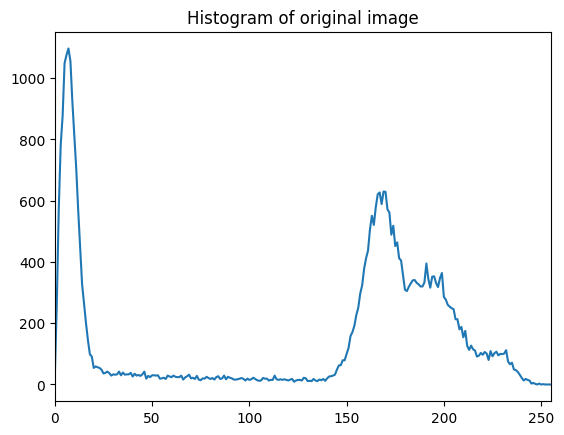

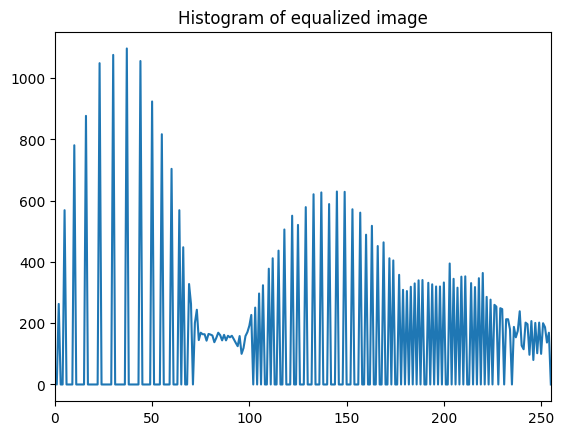

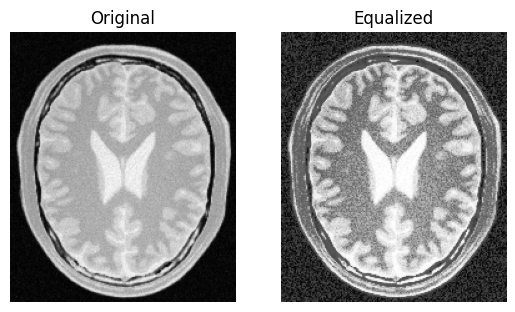

In [62]:
img_brain = cv.imread('BrainProtonDensitySlice9.png',0)

# intensity distribution of original image
hist = cv.calcHist([img_brain],[0],None,[256],[0,255])
plt.plot(hist)
plt.title('Histogram of original image')
plt.xlim([0,255])
plt.show()

#applying histogram equalization
img_equalized = cv.equalizeHist(img_brain)
hist2 = cv.calcHist([img_equalized],[0],None,[256],[0,255])
plt.plot(hist2)
plt.xlim([0,255])
plt.title('Histogram of equalized image')
plt.show()

fig,ax = plt.subplots(1,2)
ax[0].imshow(img_brain, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(img_equalized, cmap='gray')
ax[1].set_title('Equalized')
ax[1].axis('off')
plt.show()



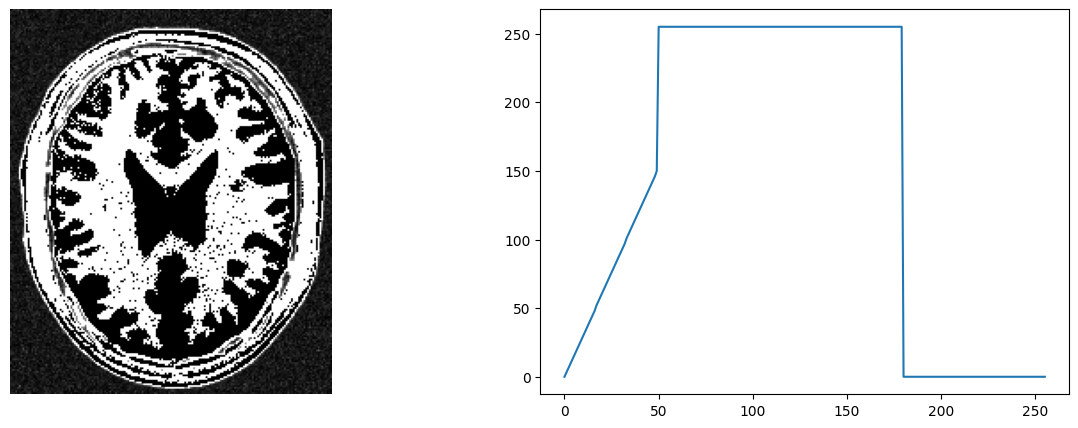

In [63]:
img = cv.imread('/content/BrainProtonDensitySlice9.png')

y1=np.linspace(0,150,50).astype(np.uint8)
y2=(np.ones(130)*255).astype('uint8')
y3=np.zeros(76).astype('uint8')
transform1 = np.hstack([y1,y2,y3])
img_t1=cv.LUT(img, transform1)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img_t1,cmap="gray")
plt.axis('off')
plt.subplot(1,2,2)
plt.plot(transform1)
plt.show()

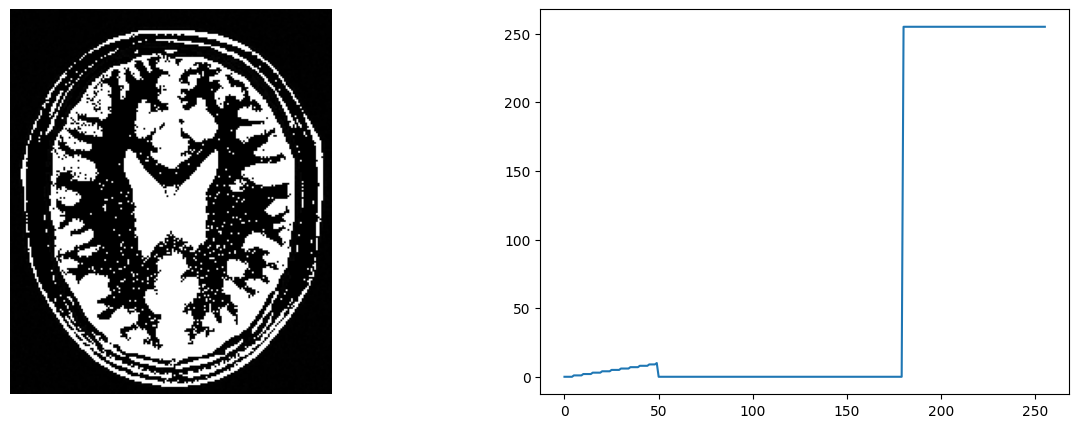

In [64]:
# defining the transform
y1 = np.linspace(0,10,50).astype('uint8')
y2 = np.zeros(130).astype('uint8')
y3 = (np.ones(76)*255).astype('uint8')

transform = np.hstack([y1,y2,y3])
img_t2 = cv.LUT(img, transform)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img_t2,cmap="gray")
plt.axis('off')
plt.subplot(1,2,2)
plt.plot(transform)
plt.show()



In [67]:
img = cv.imread('/content/highlights_and_shadows.jpg')

#histogram of the original image
colors = ('b','g','r')
for i,c in enumerate(colors):
  hist = cv.calcHist([img],[i],None,[256],[0,255])
  plt.plot(hist , color = c)
  plt.title('Histogram of the original image')
plt.show()

#converting image to lab color space
lab_img = cv.cvtColor(img, cv.COLOR_BGR2Lab)
#cv2_imshow(lab_img)

#applying gamma correction to the L plane
for gamma in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,2,5]:
  # for in_pixel in lab_img[:,:,0]:
  #   out_pixel = in_pixel ** gamma
  L, a, b = cv.split(lab_img)

  L_corrected = np.power(L / 255.0, gamma) * 255.0
  L_corrected = np.clip(L_corrected, 0, 255).astype(np.uint8)

  # Merge the corrected L channel with the original a and b channels
  lab_corrected = cv.merge([L_corrected, a, b])
  img_new = cv.cvtColor(lab_corrected,cv.COLOR_Lab2RGB)

  plt.figure(figsize=(15,5))
  for i,c in enumerate(colors):
    hist = cv.calcHist([img_new],[i],None,[256],[0,255])
    plt.subplot(1,2,1)
    plt.plot(hist , color = c)
  plt.title(f'gamma = {gamma}')
  plt.subplot(1,2,2)
  plt.imshow(img_new)
  plt.axis('off')
  plt.show()
  #cv2_imshow(img_new)





Output hidden; open in https://colab.research.google.com to view.

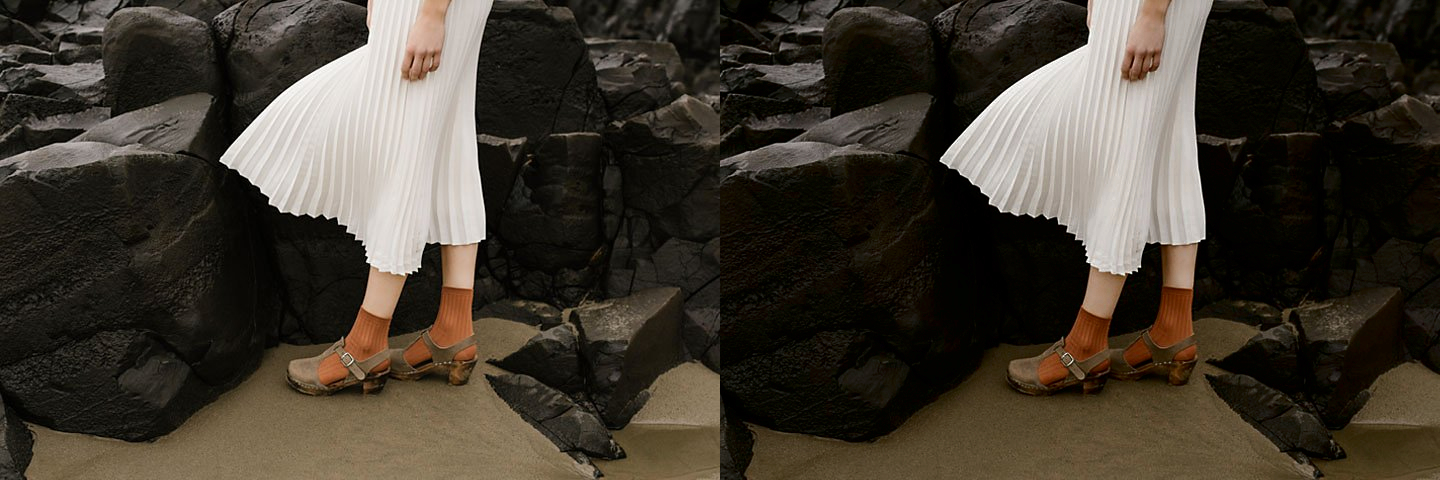

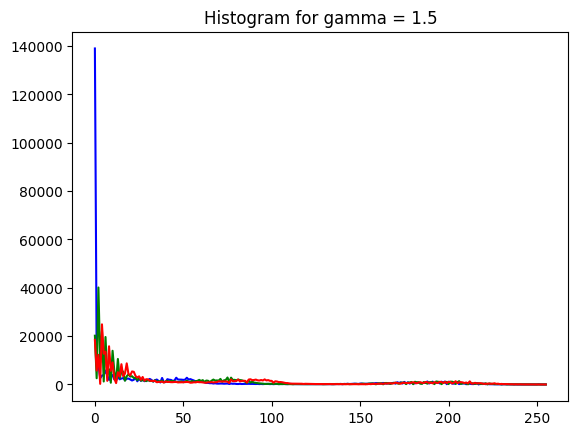

In [68]:
lab_img = cv.cvtColor(img, cv.COLOR_BGR2Lab)
L, a, b = cv.split(lab_img)

gamma = 1.5
L_corrected = np.power(L / 255.0, gamma) * 255.0
L_corrected = np.clip(L_corrected, 0, 255).astype(np.uint8)

# Merge the corrected L channel with the original a and b channels
lab_corrected = cv.merge([L_corrected, a, b])
img_new = cv.cvtColor(lab_corrected,cv.COLOR_Lab2BGR)

cv2_imshow(np.hstack([img,img_new]))

for i,c in enumerate(colors):
  hist = cv.calcHist([img_new],[i],None,[256],[0,255])
  plt.plot(hist , color = c)
  plt.title('Histogram for gamma = 1.5')
plt.show()

In [ ]:
img = cv.imread('spider.png',)
hsv_image = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h,s,v=cv.split(hsv_image) # splitting the image into the 3 planes

a_list = np.arange(0,1.1,0.1)
sigma = 70

def transform(x,a):
    p = -(x-128)**2/(2*sigma**2)
    g = x + a * 128 * np.exp(p)
    f = min(g,255)
    return f

for a in a_list:
  # applying transformation on saturation plane
  row,col = s.shape
  for i in range(0,row):
    for j in range(0,col):
      s[i][j] = transform(s[i][j],a)


  img_altered = cv.merge([h,s,v]) # recombining the three planes
  img_new = cv.cvtColor(img_altered,cv.COLOR_HSV2BGR)

  print(f'a = {a}')
  combined = np.hstack((img,img_new))
  cv2_imshow(combined)









Output hidden; open in https://colab.research.google.com to view.

Upon observing the output images for different values of 'a', a=0.3 can be assumed to be the value which gives the most appealing output.

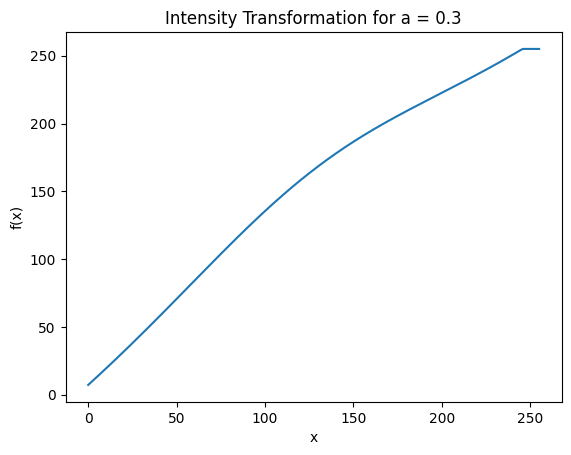

In [ ]:
input = np.arange(0,256)
l=[]
for x in input:
  l.append(transform(x,0.3))
l = np.array(l)
plt.plot(input,l)
plt.title('Intensity Transformation for a = 0.3')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

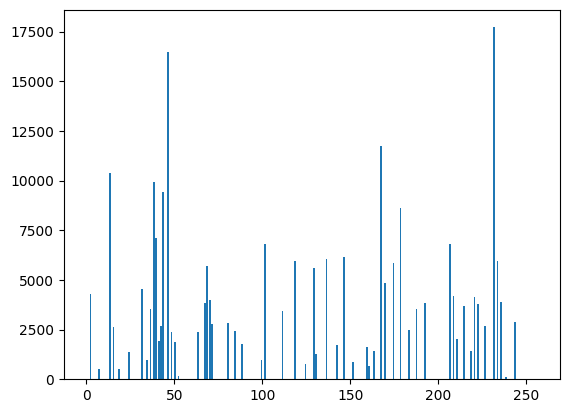

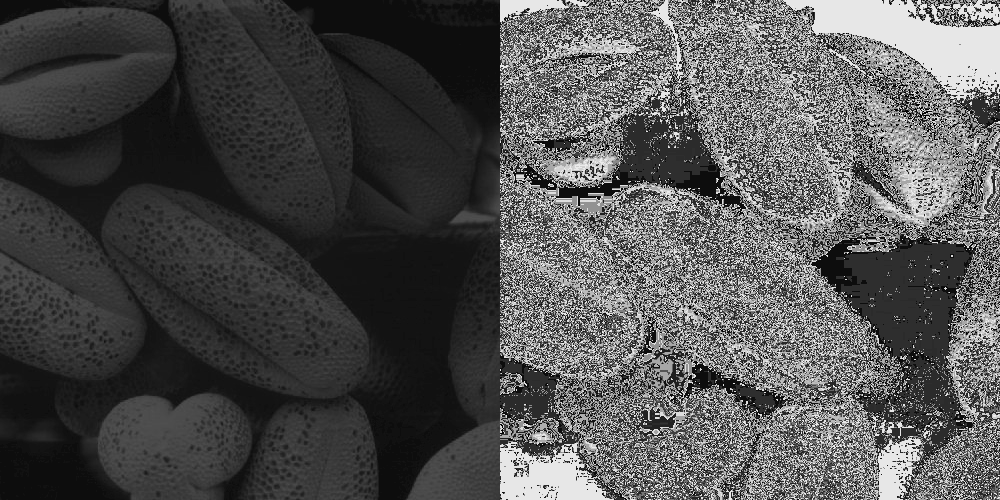

In [76]:
image = cv.imread('shells.tif',0)

def histogram_equalization(image):
  hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

  # Calculate the cumulative distribution function
  cdf = hist.cumsum()

  # Normalize the CDF so that values lie between 0 and 255
  cdf_normalized = cdf * hist.max() / cdf.max()

  # Create a mapping function using the normalized CDF
  mapping = np.interp(image.flatten(), bins[:-1], cdf_normalized)

  # Reshape the mapped values to the shape of the original plane
  image = mapping.reshape(image.shape)

  # Convert float values to 8-bit integer
  image = image.astype(np.uint8)

  plt.hist(image.flatten(),256,[0,256])
  plt.show()
  return image

equalized_image = histogram_equalization(image)
im = np.hstack((image,equalized_image))

cv2_imshow(im)

In [71]:
def histogram_equalization(image):
    image_t = image.copy()
    cols = image.shape[1]
    rows = image.shape[0]
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    transform = []
    cumsum = 0
    for i in range(len(hist)):
        cumsum+= hist[i]
        transform.append(np.round(cumsum/(rows*cols)*255))
    for i in range(rows):
      for j in range(cols):
        image_t[i][j] = transform[image[i][j]]
    transform = np.array(transform)
    return image_t


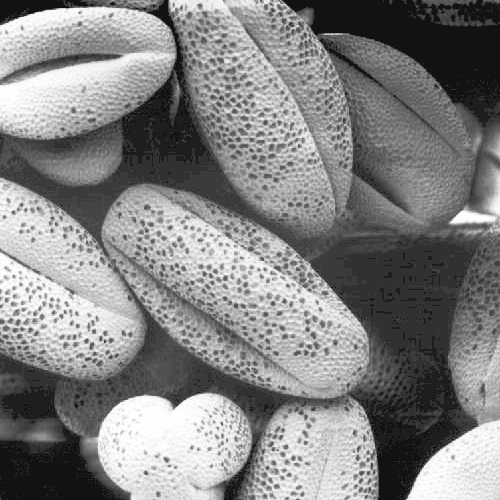

In [72]:
r = histogram_equalization(image)
cv2_imshow(r)

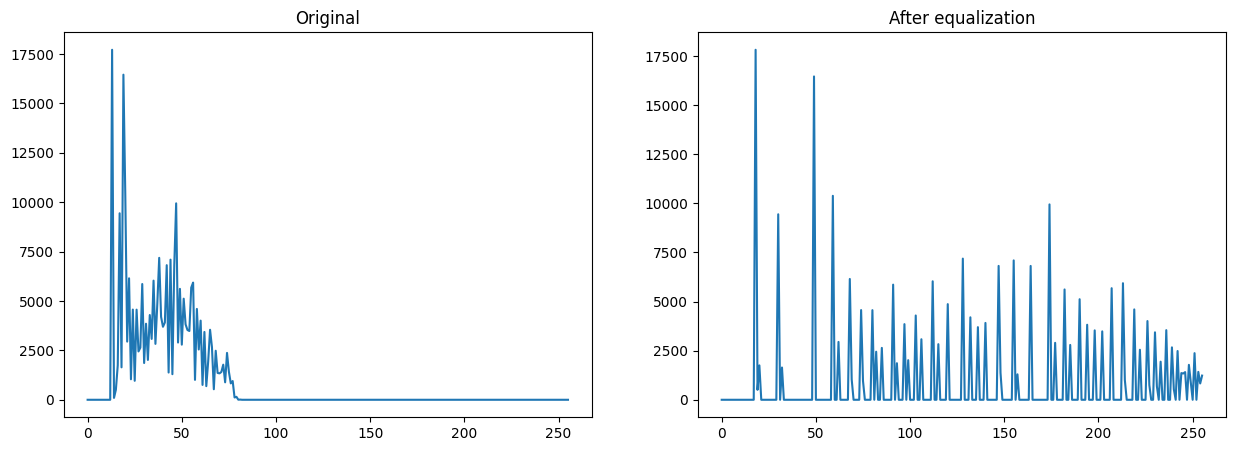

In [78]:
hist1, bins1 = np.histogram(image.flatten(), bins=256, range=[0, 256])
hist2, bins2 = np.histogram(r.flatten(), bins=256, range=[0, 256])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist1)
plt.title('Original')
plt.subplot(1,2,2)
plt.plot(hist2)
plt.title('After equalization')
plt.show()


In [ ]:
img = cv.imread('jeniffer.jpg')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h,s,v = cv.split(img_hsv)
planes = np.hstack([h,s,v])
cv2_imshow(planes)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img=cv.imread("jeniffer.jpg",0)
t, mask = cv.threshold(s, 11, 1, cv.THRESH_BINARY)
img_fore=cv.bitwise_and(img,img,mask=mask)
plt.imshow(img_fore,cmap="gray")
plt.axis('off')
plt.show()

hist,bins = np.histogram(img_fore.flatten(),256,[0,256])
cdf = hist.cumsum()

plt.hist(img_fore.flatten(),256,[0,256])
plt.ylim([0,50000])
plt.show()

# equalizing the foreground
fore_equ = cv.equalizeHist(img_fore)
img_back=cv.bitwise_and(img,img,mask=1 - mask)
result = cv.add(img_back,fore_equ)


plt.imshow(img_back, cmap = "gray")
plt.axis('off')
plt.show()

cv2_imshow(np.hstack([img,result]))



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
image = cv2.imread('jeniffer.jpg')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define a threshold range for foreground in the Value (V) component
lower_threshold = 100
upper_threshold = 255

# Create a binary mask for the foreground based on the Value component
foreground_mask = cv2.inRange(hsv_image[:, :, 2], lower_threshold, upper_threshold)

# Apply histogram equalization to the Value (V) component for the foreground only
equalized_v = cv2.equalizeHist(hsv_image[:, :, 2])

# Create a new Value (V) component by combining the equalized values with the background
new_v = cv2.bitwise_and(hsv_image[:, :, 2], cv2.bitwise_not(foreground_mask)) + cv2.bitwise_and(equalized_v, foreground_mask)

# Replace the Value (V) component of the original HSV image
hsv_image[:, :, 2] = new_v

# Convert the modified HSV image back to BGR color space
equalized_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Display the original and equalized images
cv2_imshow(np.hstack((image, equalized_image)))



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image = cv.imread('jeniffer.jpg')

# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define a threshold range for foreground in the Value (V) component
lower_threshold = 100
upper_threshold = 255

# Create a binary mask for the foreground based on the Value component
foreground_mask = cv.inRange(hsv_image[:, :, 2], lower_threshold, upper_threshold)

# extracting only the foreground
foreground = cv.bitwise_and(hsv_image[:, :, 2],hsv_image[:, :, 2],mask = foreground_mask)

# computing the histogram and cumulative sum for the foreground
hist,bins = np.histogram(foreground.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(cdf)
plt.subplot(1,2,2)
plt.plot(bins[:-1],hist)
plt.title('Foreground histogram before equalization')
plt.show()

equalized_foreground = cv.equalizeHist(foreground)
hist,bins = np.histogram(equalized_foreground.flatten(),256,[0,256])
cdf = hist.cumsum()
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(cdf)
plt.subplot(1,2,2)
plt.plot(bins[:-1],hist)
plt.title('Foreground histogram after equalization')
plt.show()

background_mask=cv.bitwise_not(foreground_mask)
background = cv.bitwise_and(hsv_image[:, :, 2],hsv_image[:, :, 2],mask = background_mask)
final_v = cv.bitwise_or(equalized_foreground, background)

h,s,v= cv.split(hsv_image)
result = cv.merge([h,s,final_v])
final_image = cv.cvtColor(result, cv.COLOR_HSV2BGR)

cv2_imshow(foreground_mask)
cv2_imshow(np.hstack([image,final_image]))






Output hidden; open in https://colab.research.google.com to view.

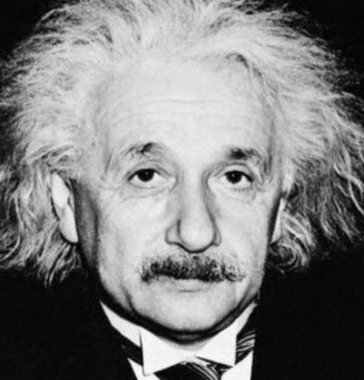

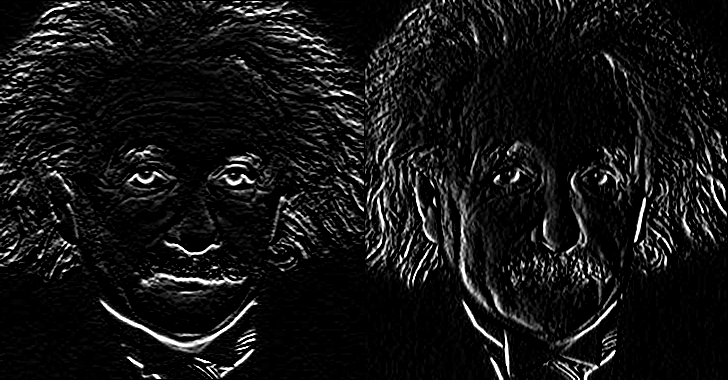

In [3]:
img = cv.imread('einstein.png',0)

sobel_vert = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = 'float')
sobel_hori = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = 'float')
gradient_y = cv.filter2D(img,-1,sobel_vert)
gradient_x = cv.filter2D(img,-1,sobel_hori)

#result = np.sqrt(gradient_y**2 + gradient_x**2)


cv2_imshow(img)
cv2_imshow(np.hstack([gradient_y,gradient_x]))
#cv2_imshow(gradient_x)


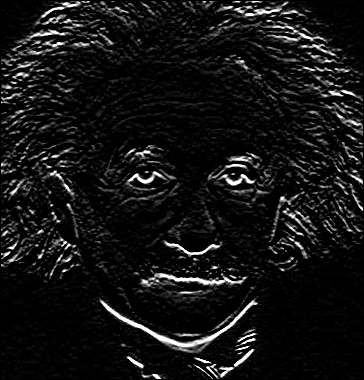

In [6]:
def sobelfilter(img,kernel):
  result = np.zeros(img.shape)
  r_d,c_d = int((kernel.shape[0]-1)/2) , int((kernel.shape[1]-1)/2)
  #padded_img = cv.copyMakeBorder(img, r_d, r_d, c_d, c_d, cv.BORDER_CONSTANT, value=(0, 0, 0))
  rows,cols =img.shape
  for r in range(r_d,rows-r_d):
    for c in range(c_d,cols-c_d):
      result[r][c] = np.dot(img[r-r_d:r+r_d+1 , c-c_d:c+c_d+1].flatten(),kernel.flatten())
  return result

image = cv.imread('einstein.png',0)
img_filtered = sobelfilter(image,sobel_vert)
cv2_imshow(img_filtered)




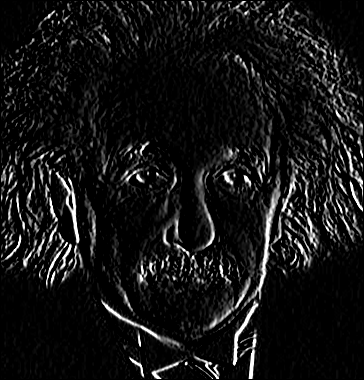

In [10]:
arr1 = np.array([[1],[2],[1]])
arr2=np.array([[1,0,-1]])

result = sobelfilter(image,arr1)
result = sobelfilter(result,arr2)

cv2_imshow(result)


In [97]:
def ssd(test_img,zoomed_img):
  if test_img.shape == zoomed_img.shape:
    squared_diff = (test_img.astype(np.float32) - zoomed_img.astype(np.float32))**2
    nssd = np.sum(squared_diff)/(test_img.shape[0]*test_img.shape[1])
    return nssd
  else:
    return -1

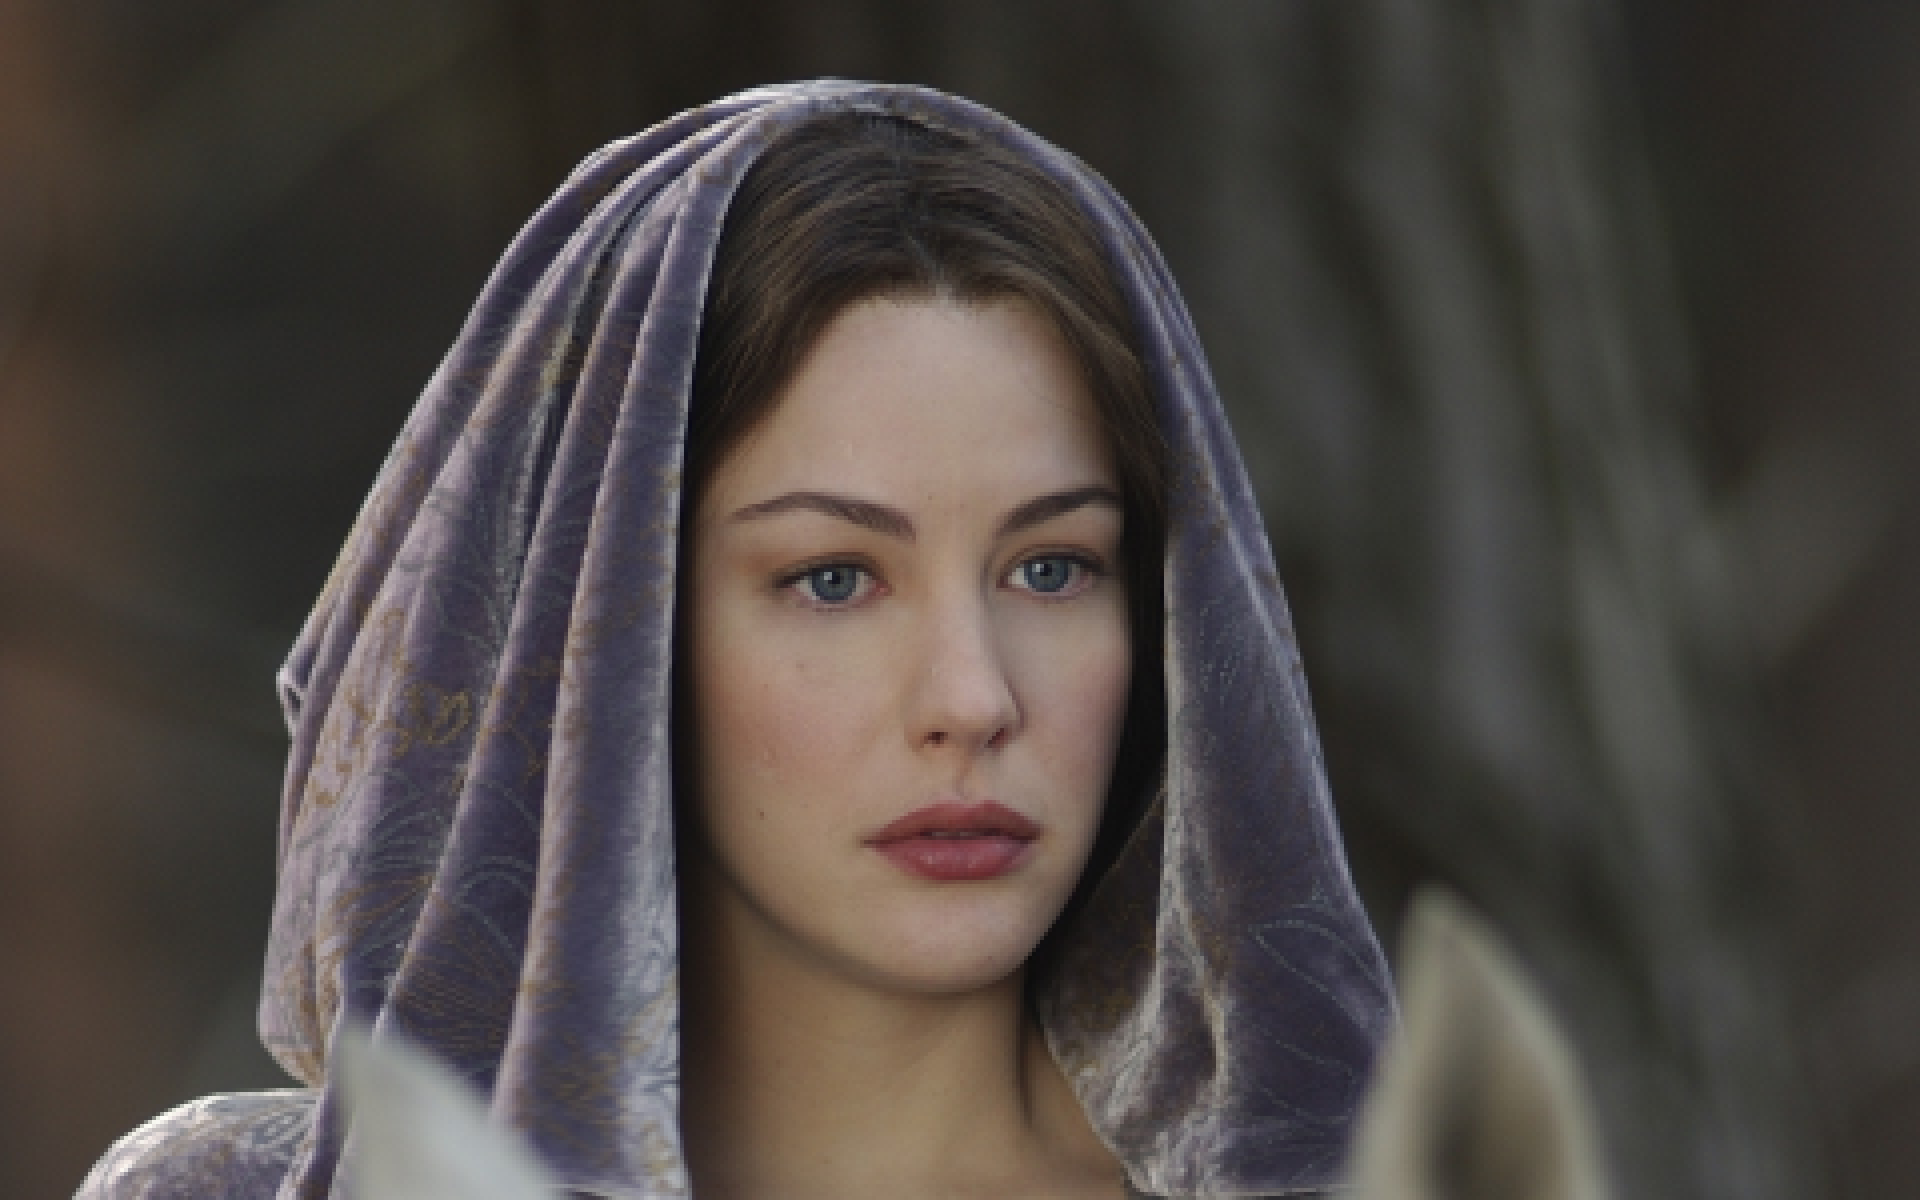

79.33821527777778

In [103]:
def zoom_nearest_neighbor(image, zoom_factor):
    # Calculate new dimensions
    new_height = int(image.shape[0] * zoom_factor)
    new_width = int(image.shape[1] * zoom_factor)
    # Create an empty canvas for the zoomed image
    zoomed_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    # Nearest neighbor interpolation
    for i in range(new_height):
        for j in range(new_width):
            original_i = int(i / zoom_factor)
            original_j = int(j / zoom_factor)
            zoomed_image[i, j] = image[original_i, original_j]
    return zoomed_image



# Define the zoom factor
zoom_factor = 4  # Increase the size by a factor of 4

img = cv.imread('im02small.png') # image without being zoomed
img_test = cv.imread('im02.png') # zoomed image to be tested with

# Zoom using nearest neighbor interpolation
zoomed_imagenn = zoom_nearest_neighbor(img, zoom_factor)

# Display the original and zoomed images
cv2_imshow(zoomed_imagenn)
ssd(img_test,zoomed_imagenn)

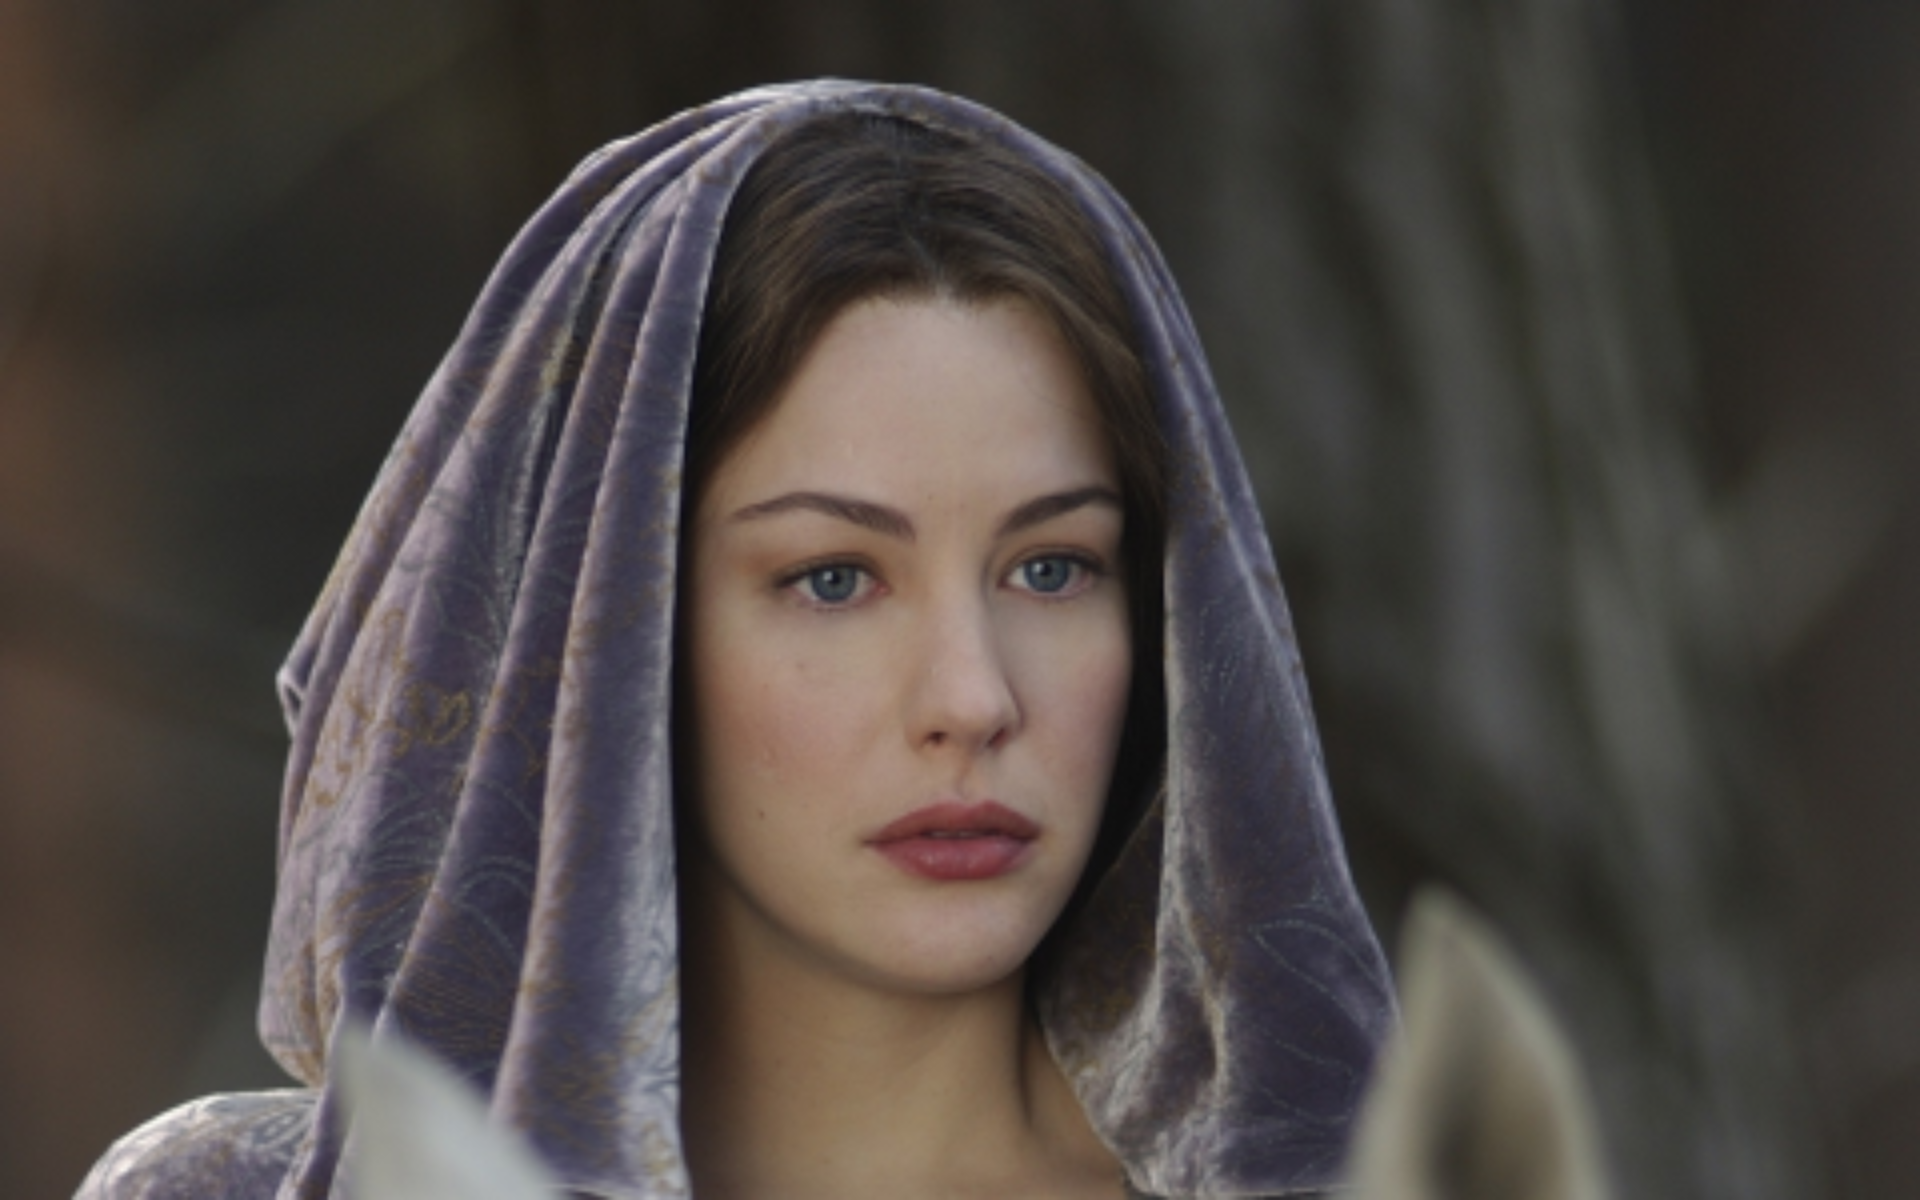

In [ ]:
img = cv.imread('im02small.png')

# resizing the image
h = img.shape[0]*4
w = img.shape[1]*4

img_resized = cv.resize(img,(w,h))

cv2_imshow(img_resized)

In [ ]:
ssd(img_test,img_resized)

55.03773263888889

In [ ]:
cv2_imshow(img_test)

Output hidden; open in https://colab.research.google.com to view.

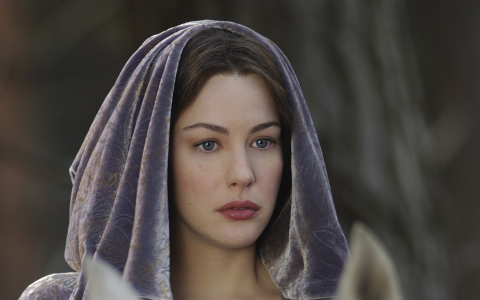

In [ ]:
cv2_imshow(img)

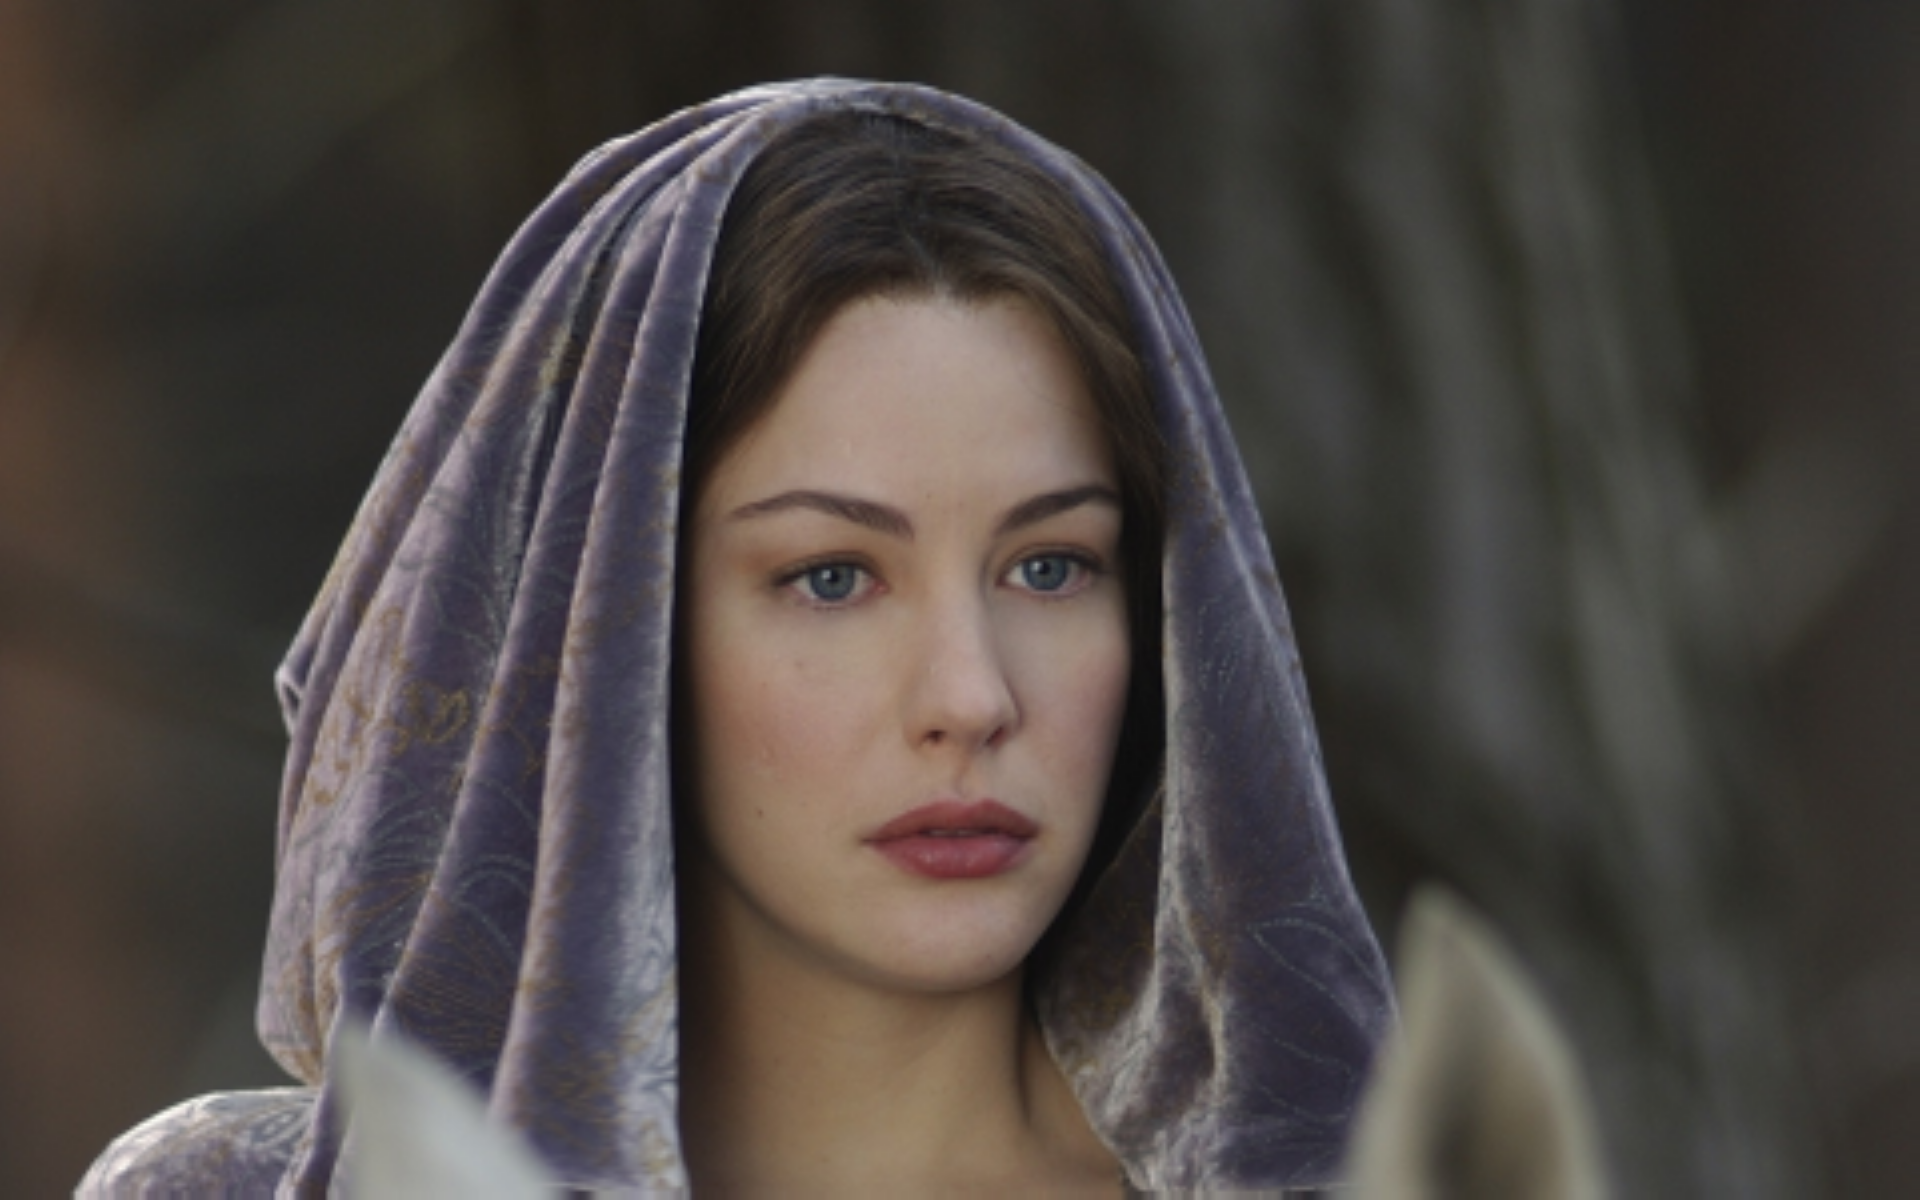

In [102]:
def zoom_bilinear(image, zoom_factor):
    # Calculate new dimensions
    new_height = int(image.shape[0] * zoom_factor)
    new_width = int(image.shape[1] * zoom_factor)

    # Create an empty canvas for the zoomed image
    zoomed_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)

    # Calculate scaling factors
    scale_x = float(image.shape[1]) / new_width
    scale_y = float(image.shape[0]) / new_height

    # Bilinear interpolation
    for i in range(new_height):
        for j in range(new_width):
            original_i = i * scale_y
            original_j = j * scale_x
            top_left = [int(np.floor(original_i)), int(np.floor(original_j))]
            top_right = [int(np.floor(original_i)), int(np.ceil(original_j))]
            bottom_left = [int(np.ceil(original_i)), int(np.floor(original_j))]
            bottom_right = [int(np.ceil(original_i)), int(np.ceil(original_j))]
            delta_i = original_i - top_left[0]
            delta_j = original_j - top_left[1]
            if top_left[0] >= image.shape[0] - 1: top_left[0] = image.shape[0] - 2
            if top_left[1] >= image.shape[1] - 1: top_left[1] = image.shape[1] - 2
            if top_right[0] >= image.shape[0] - 1: top_right[0] = image.shape[0] - 2
            if top_right[1] >= image.shape[1] - 1:
                top_right[1] = image.shape[1] - 2
            if bottom_left[0] >= image.shape[0] - 1:
                bottom_left[0] = image.shape[0] - 2
            if bottom_left[1] >= image.shape[1] - 1:
                bottom_left[1] = image.shape[1] - 2
            if bottom_right[0] >= image.shape[0] - 1:
                bottom_right[0] = image.shape[0] - 2
            if bottom_right[1] >= image.shape[1] - 1:
                bottom_right[1] = image.shape[1] - 2
            interpolated_pixel = (1 - delta_i) * (1 - delta_j) * image[top_left[0], top_left[1]] + \
                                 (1 - delta_i) * delta_j * image[top_right[0], top_right[1]] + \
                                 delta_i * (1 - delta_j) * image[bottom_left[0], bottom_left[1]] + \
                                 delta_i * delta_j * image[bottom_right[0], bottom_right[1]]
            zoomed_image[i, j] = interpolated_pixel.astype(np.uint8)
    return zoomed_image


# Load an image
image = cv.imread('im02small.png')

# Define the zoom factor
zoom_factor = 4  # Increase the size by a factor of 2

# Zoom using bilinear interpolation
zoomed_imagebl = zoom_bilinear(image, zoom_factor)

# Display the original and zoomed images
cv2_imshow(zoomed_imagebl)


In [101]:
ssd(img_test,zoomed_imagebl)

601.2944444444445

In [75]:
cv2_imshow(img_test)

Output hidden; open in https://colab.research.google.com to view.

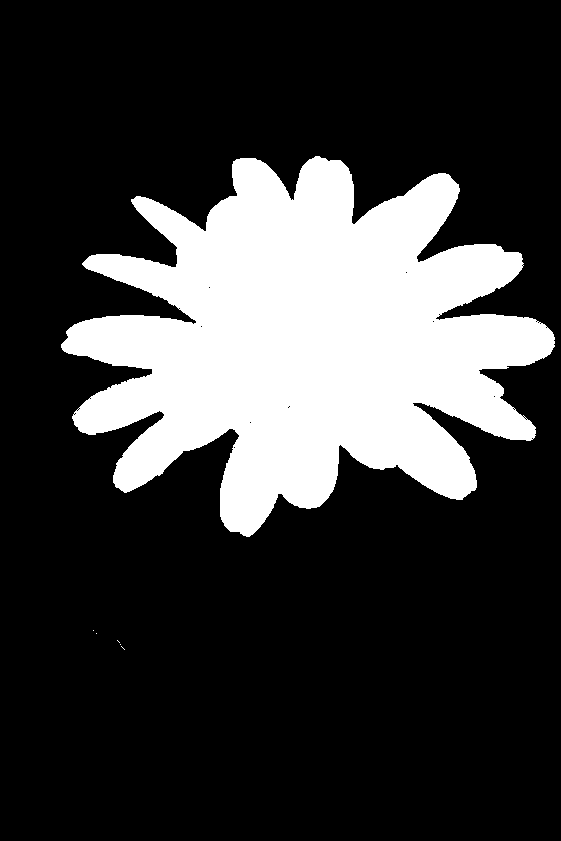

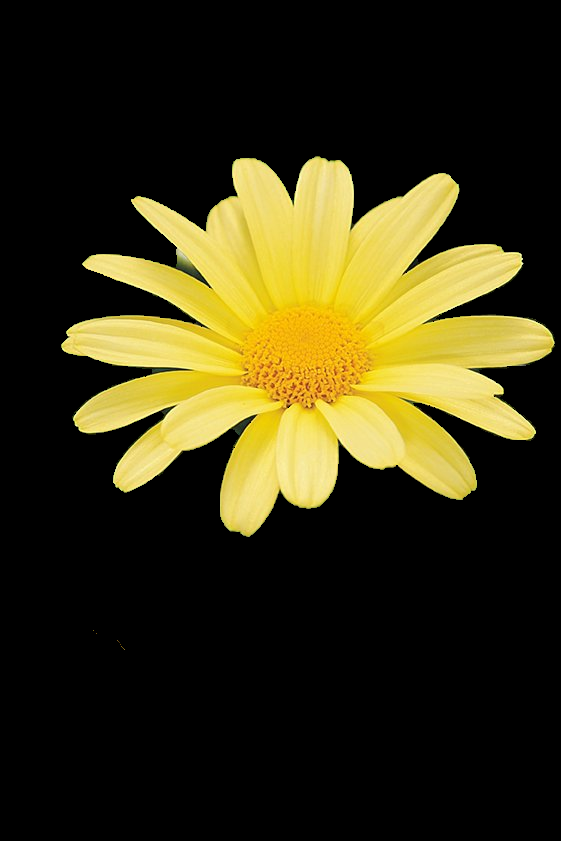

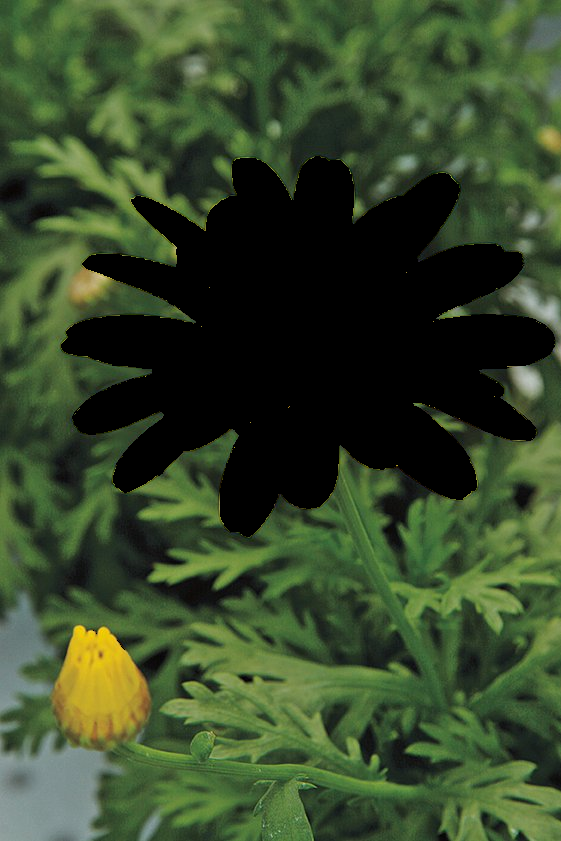

In [90]:
img = cv.imread('daisy.jpg')
mask = np.zeros(img.shape[:2], dtype = 'uint8')
rect = (40,150,560,500)

fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")

(mask, bgModel, fgModel) = cv.grabCut(img, mask, rect, bgModel,fgModel, iterCount=2, mode=cv.GC_INIT_WITH_RECT)

fore_mask = (mask == cv.GC_PR_FGD).astype("uint8") * 255
outmask_fore = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD),0,1)
outmask_fore = (outmask_fore*255).astype(np.uint8)
foreground_img = cv.bitwise_and(img,img,mask=outmask_fore)

back_mask = (mask == cv.GC_PR_BGD).astype("uint8") * 255
outmask_back = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD),0,1)
outmask_back = (outmask_back*255).astype(np.uint8)
background_img = cv.bitwise_and(img,img,mask=outmask_back)
cv2_imshow(fore_mask)
cv2_imshow(foreground_img)
cv2_imshow(background_img)


In [93]:
result = np.clip(np.add(foreground_img, cv.GaussianBlur(background_img, (9,9) , 4)) ,0,255)

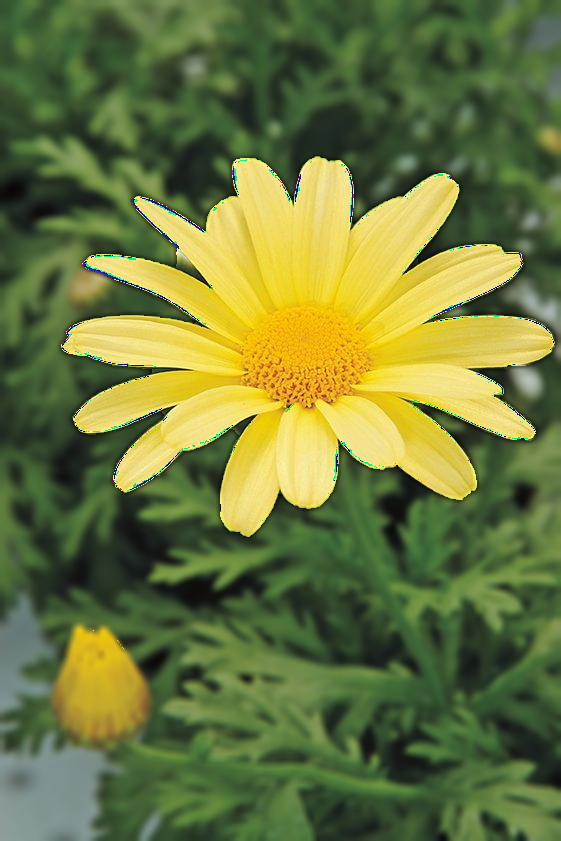

In [94]:
cv2_imshow(result)